# Cosmological structure

How to use `twinLab` to create a cosmological structure model.

## Configuration

In [1]:
USER_NAME = "Dodders"
GROUP_NAME = "digiLab"

CAMPAIGN_ID = "biscuits"

TRAINING_DATA = "train.csv"
EMULATOR_PARAMS = "params.json"
EVALUATION_DATA = "eval.csv"

In [ ]:
import os

CAMPAIGN_DIR = os.path.join(".", "resources", "campaigns", CAMPAIGN_ID)

DATASET_PATH = os.path.join(CAMPAIGN_DIR, TRAINING_DATA)
PARAMS_PATH = os.path.join(CAMPAIGN_DIR, EMULATOR_PARAMS)
EVALUATION_PATH = os.path.join(CAMPAIGN_DIR, EVALUATION_DATA)

print(f"Dataset..... {DATASET_PATH}")
print(f"Parameters.. {PARAMS_PATH}")
print(f"Evaluate.... {EVALUATION_PATH}")

Dataset..... ./resources/campaigns/biscuits/train.csv
Parameters.. ./resources/campaigns/biscuits/params.json
Evaluate.... ./resources/campaigns/biscuits/eval.csv


### .env

Create an `.env` file from `.env.example`, and fill in your `USER_NAME` and `GROUP_NAME`.

In [3]:
!cp .env.example .env

In [4]:
import dotenv

dotenv_file = dotenv.find_dotenv()
dotenv.set_key(dotenv_file, "USER_NAME", USER_NAME)
dotenv.set_key(dotenv_file, "GROUP_NAME", GROUP_NAME);

### Library

Import the `twinLab` client with: 

In [5]:
import twinlab as tl


      == Client Initialisation ==
      Local Server  : http://localhost:3000
      Cloud Server  : https://z2seun1aee.execute-api.eu-west-2.amazonaws.com/Prod
      Group Name    : digiLab
      User Name     : Dodders
      


Ensure that the correct group and user names are reported.
These are used to track client usage.

## Run

### Upload dataset

We'll use the csv data in `resources/data/train.csv` to train our emulator:

In [6]:
tl.upload_dataset(DATASET_PATH)

**NOTE:** If your dataset is larger than `6mb` you should use `tl.upload_big_dataset(DATASET_PATH)`

### List datasets

Check which datasets are avalible to train with:

In [7]:
tl.list_datasets()

['train.csv']

### View dataset statistics

You can query the statistical data about a dataset:

In [8]:
tl.query_dataset(TRAINING_DATA)

,x,y
count,10.000000,10.000000
mean,0.544199,0.029383
std,0.229352,0.748191
min,0.226851,-0.960764
25%,0.399865,-0.694614
50%,0.516123,0.087574
75%,0.693559,0.734513
max,0.980764,0.921553


### Train

Set emulator parameters:

In [9]:
import json

with open(PARAMS_PATH, "r") as f:
    params = json.load(f)
params["filename"] = TRAINING_DATA

print(f"params = {json.dumps(params, indent=2)}")

params = {
  "estimator": "gaussian_process_regression",
  "filename": "train.csv",
  "inputs": [
    "x"
  ],
  "outputs": [
    "y"
  ],
  "train_test_split": 10
}


Train the emulator:

In [10]:
tl.train_campaign(params, CAMPAIGN_ID)

### View the trained emulators:

Check which campaigns are ready with:

In [11]:
tl.list_campaigns()

['biscuits']

### View emulator metadata

View an emulator's metadata:

In [12]:
response = tl.query_campaign(CAMPAIGN_ID)
print(json.dumps(response, indent=2))

{
  "inputs": [
    "x"
  ],
  "outputs": [
    "y"
  ],
  "diagnostics": {
    "transformer_diagnostics": [],
    "estimator_diagnostics": {
      "likelihood.noise_covar.raw_noise": [
        0.03031922037067703
      ],
      "likelihood.noise_covar.noise_prior.concentration": 1.100000023841858,
      "likelihood.noise_covar.noise_prior.rate": 0.05000000074505806,
      "likelihood.noise_covar.raw_noise_constraint.lower_bound": 9.999999747378752e-05,
      "likelihood.noise_covar.raw_noise_constraint.upper_bound": Infinity,
      "mean_module.raw_constant": 0.210623099693663,
      "covar_module.raw_outputscale": 1.512396685623281,
      "covar_module.base_kernel.raw_lengthscale": [
        [
          -0.6401321833497503
        ]
      ],
      "covar_module.base_kernel.lengthscale_prior.concentration": 3.0,
      "covar_module.base_kernel.lengthscale_prior.rate": 6.0,
      "covar_module.base_kernel.raw_lengthscale_constraint.lower_bound": 0.0,
      "covar_module.base_kernel.raw

### Sample

Sample the emulator:

In [13]:
df_mean, df_std = tl.sample_campaign(EVALUATION_PATH, CAMPAIGN_ID)

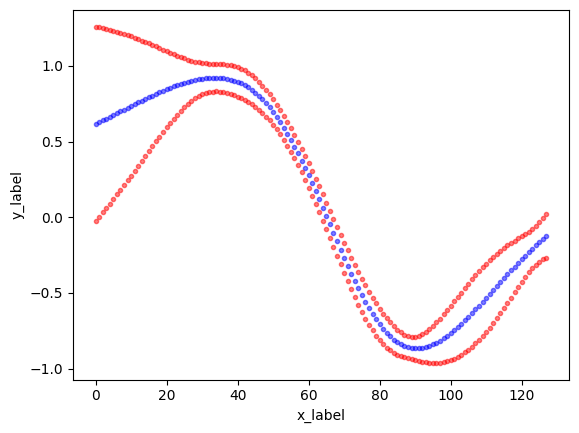

In [14]:
import matplotlib.pyplot as plt

plt.plot(df_mean, ".", color="blue", alpha=0.5)
plt.plot(df_mean + df_std, ".", color="red", alpha=0.5)
plt.plot(df_mean - df_std, ".", color="red", alpha=0.5)
plt.xlabel("x_label")
plt.ylabel("y_label")
plt.show()

### Delete dataset

Delete an existing dataset with:

In [15]:
tl.delete_dataset(TRAINING_DATA)

### Delete emulator

Delete a trained emulator with:

In [16]:
tl.delete_campaign(CAMPAIGN_ID)